<a href="https://colab.research.google.com/github/siddharth20323/siddharth20323/blob/main/FINAL_fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle

In [3]:
 from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"siddharthkumar331","key":"f23c785a1e740243f1757bf9a39de685"}'}

In [4]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:

!ls | grep kaggle


kaggle (1) (1).json
kaggle (1).json


In [6]:
!cp "kaggle (1).json" ~/.kaggle/


In [7]:
! chmod 600 ~/.kaggle/"kaggle (1).json"

In [8]:
!cp "kaggle (1).json" ~/.kaggle/kaggle.json


In [13]:
! kaggle dataset list

usage: kaggle [-h] [-v] [-W]
              {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
              ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')


In [9]:
! chmod 600 /root/.kaggle/kaggle.json

In [15]:
! kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
rakeshkapilavai/extrovert-vs-introvert-behavior-data            Extrovert vs. Introvert Behavior Data                    31277  2025-06-13 14:26:48.303000          19957        431  1.0              
bismasajjad/global-ai-job-market-and-salary-trends-2025         Global AI Job Market & Salary Trends 2025               529004  2025-06-01 07:20:49.537000           8278        141  0.9411765        
adilshamim8/social-media-addiction-vs-relationships             Students' Social Media Addiction                          7851  2025-05-10 14:38:02.713000          19871        296  1.0              


In [25]:
# # Download Fruits-360 Dataset
!kaggle datasets download -d moltean/fruits -p ./datasets/fruits --unzip





Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
 99% 3.45G/3.47G [00:37<00:00, 116MB/s] 
100% 3.47G/3.47G [00:37<00:00, 99.2MB/s]


In [ ]:
 # !kaggle datasets download -d ashwingupta3012/human-faces -p ./datasets/human_faces --unzip



Dataset URL: https://www.kaggle.com/datasets/ashwingupta3012/human-faces
License(s): CC0-1.0
 99% 1.80G/1.82G [00:22<00:00, 110MB/s]
100% 1.82G/1.82G [00:22<00:00, 85.9MB/s]


In [19]:
pip install tensorflow keras numpy opencv-python matplotlib scikit-learn

In [20]:
pip install tensorflow


In [ ]:
!-m venv myenv


zsh: bad option string: '-m venv myenv'


In [10]:
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import matplotlib as plt
# import numpy as np
# import os


In [11]:
train_dt = "/content/datasets/fruits/fruits-360_100x100/fruits-360/Training"
test_dt = "/content/datasets/fruits/fruits-360_100x100/fruits-360/Test"


Image_size=(64,64)
Batch_size=64

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
train_datagen=ImageDataGenerator( #create image ..tensorflow ... good robust image


    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # it means 80% data-training and 20% validation
)
train_gen=train_datagen.flow_from_directory( # for 80% training
    train_dt,
    target_size=Image_size,
    batch_size=Batch_size,
    class_mode='categorical', # one- hot encodding used in multi classi
    subset='training'
)

val_gen=train_datagen.flow_from_directory( #for 20% validation
    train_dt,
    target_size=Image_size,
    batch_size=Batch_size,
    class_mode='categorical',
    subset='validation'

)

Found 83260 images belonging to 206 classes.
Found 20733 images belonging to 206 classes.


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import MaxPooling2D



In [15]:
#using relu activaytion for faster accuracy
model = Sequential([ # it is deep learing model using neural networkd
    Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),


    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),


    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(train_gen.num_classes,activation='softmax')

])

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
#     MaxPooling2D(2,2),
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(2,2),
#     Flatten(),
#     Dense(4608, activation='relu'),  # Change this to match the expected size
#     Dense(128, activation='relu'),
#     Dense(3, activation='softmax')
# ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 180s 133ms/step - accuracy: 0.4640 - loss: 2.2768 - val_accuracy: 0.8720 - val_loss: 0.4266
Epoch 2/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 168s 129ms/step - accuracy: 0.9092 - loss: 0.2884 - val_accuracy: 0.8716 - val_loss: 0.4041
Epoch 3/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 178s 137ms/step - accuracy: 0.9346 - loss: 0.1936 - val_accuracy: 0.8547 - val_loss: 0.4432
Epoch 4/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 177s 136ms/step - accuracy: 0.9509 - loss: 0.1435 - val_accuracy: 0.6276 - val_loss: 1.8940
Epoch 5/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 168s 129ms/step - accuracy: 0.9578 - loss: 0.1241 - val_accuracy: 0.9155 - val_loss: 0.2685
Epoch 6/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 168s 129ms/step - accuracy: 0.9653 - loss: 0.1040 - val_accuracy: 0.8766 - val_loss: 0.4684
Epoch 7/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 169s 130ms/step - accuracy: 0.9664 - loss: 0.1009 - val_accuracy: 0.9482 - val_loss: 0.2057
Epoch 8/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 167s 128ms/step - ac

In [42]:

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")



Final Training Accuracy: 97.54%
Final Validation Accuracy: 86.05%


In [41]:
import matplotlib.pyplot as plt


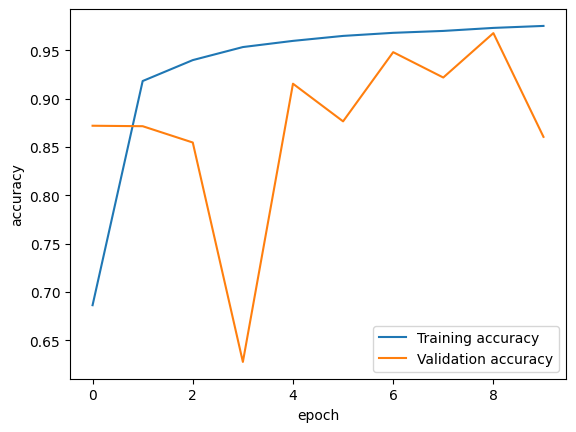

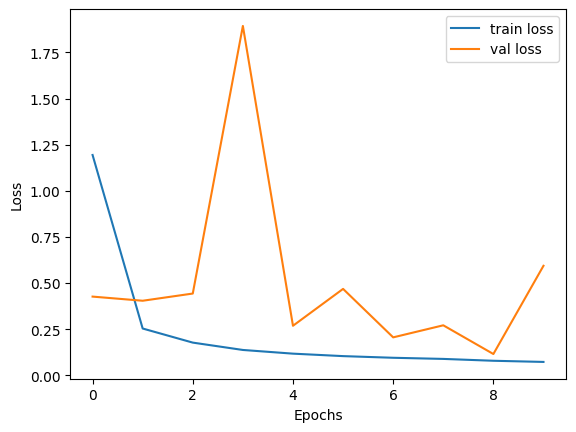

In [24]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
print(train_gen.class_indices)


{'Apple 10': 0, 'Apple 11': 1, 'Apple 12': 2, 'Apple 13': 3, 'Apple 14': 4, 'Apple 17': 5, 'Apple 18': 6, 'Apple 19': 7, 'Apple 5': 8, 'Apple 6': 9, 'Apple 7': 10, 'Apple 8': 11, 'Apple 9': 12, 'Apple Braeburn 1': 13, 'Apple Core 1': 14, 'Apple Crimson Snow 1': 15, 'Apple Golden 1': 16, 'Apple Golden 2': 17, 'Apple Golden 3': 18, 'Apple Granny Smith 1': 19, 'Apple Pink Lady 1': 20, 'Apple Red 1': 21, 'Apple Red 2': 22, 'Apple Red 3': 23, 'Apple Red Delicious 1': 24, 'Apple Red Yellow 1': 25, 'Apple Red Yellow 2': 26, 'Apple Rotten 1': 27, 'Apple hit 1': 28, 'Apple worm 1': 29, 'Apricot 1': 30, 'Avocado 1': 31, 'Avocado Black 1': 32, 'Avocado Green 1': 33, 'Avocado ripe 1': 34, 'Banana 1': 35, 'Banana 3': 36, 'Banana 4': 37, 'Banana Lady Finger 1': 38, 'Banana Red 1': 39, 'Beans 1': 40, 'Beetroot 1': 41, 'Blackberrie 1': 42, 'Blackberrie 2': 43, 'Blackberrie half rippen 1': 44, 'Blackberrie not rippen 1': 45, 'Blueberry 1': 46, 'Cabbage red 1': 47, 'Cabbage white 1': 48, 'Cactus fruit 1

In [17]:
model.save("fruit_recognition_model.keras")

In [26]:
import json

with open("class_indices.json", "w") as f:
    json.dump(train_gen.class_indices, f)



In [27]:
with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

class_labels = [label for label, idx in sorted(class_indices.items(), key=lambda item: item[1])]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
Predicted Fruit: Banana Red 1


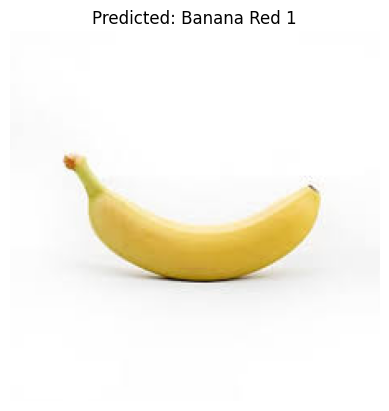

In [34]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

model=tf.keras.models.load_model("fruit_recognition_model.keras")
Image_size=(64,64)
class_labels = [label for label, idx in sorted(train_gen.class_indices.items(), key=lambda item: item[1])]


image_path="/content/download.jpeg"
img = cv2.imread(image_path)
img = cv2.resize(img, Image_size)
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

prediction=model.predict(img)
predict_label=class_labels[np.argmax(prediction)]

print("Predicted Fruit:", predict_label)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {predict_label}")
plt.axis('off')
plt.show()